In [323]:
# Import
import os
from pathlib import PurePath

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
# Pandas allows you to modify its display settings to improve the readability of data or to fit specific needs when exploring large datasets.
# These settings do not modify the underlying data but control how it is displayed in the console/notebook.
# .2f - 2 decimal places
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
# Pandas normally limits the number of columns shown in teh output for readability. 
# Setting `max_columns` to a very high value (e.g., 999) ensures that all columns in the DataFrame are visible regardless of their number.
# Useful because when dealing with wide datasets, this prevents truncation of columns, making it easier to inspect all data without needing additional
# ... commands to view subjects. 
pd.set_option('display.max_columns', 999)

In [324]:
# Using Pathlib
# Set path
from pathlib import Path
path = Path('/Users/aliamahama-rodriguez/project_directory')

os.getcwd()

'/Users/aliamahama-rodriguez'

In [325]:
## Data Exploration

# % unzip ./project_directory/online+retail+ii.zip # extracting .zip file 

df = pd.read_excel("./project_directory/online_retail_II.xlsx", sheet_name=0) # only want to read the first sheet
df.head(10)



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [326]:
# High-level view of data/Data Exploration 
df.info()

# Conversions
# df['Invoicedate'] = pd.to_datetime(df['InvoiceDate'], errors = 'coerce') -> errors='coerce' ensures that if there are any invalid date strings, they will be converted to NaT (missing values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


* Note there are roughly 520k entries, different columns and their data types; `Customer ID` has missing info. `InvoiceData` has been included as a datetime64[ns] value. 


In [327]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [328]:
df.describe(include='O') # String-like data or Object data inspection

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [329]:
# Inspect missing CustomerID 
# Note: When we have NaN/missing Customer ID information, we cannot categorize or infer their behavior. 

# So, drop NULL customers

df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [330]:
df[df["Quantity"] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [331]:
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$") == True]
df[df["Invoice"].str.match("^\\d{6}$") == False]

# For characters: ---- > df[df["Invoice"].str.match("^[a-zA-Z]{6}$")== True]



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [332]:
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

df[df["Invoice"].str.startswith("A")] # Looks like accounting operations 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [333]:
df["StockCode"] = df["StockCode"].astype("str")
df[df["StockCode"].str.match("^\\d{5}$") == False] 

df[(df["StockCode"].str.match("^\\d{5}$") == False) & ((df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False))]["StockCode"].unique() # Distinct list of StockCodes which do not follow the expected pattern


array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [334]:
df[df["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


DATA CLEANING

In [335]:
cleaned_df = df.copy()

In [336]:
# Clean invoice column
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

# Filter expression/mask
mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]
cleaned_df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [337]:
# Stock Codes
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask_02 = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True) 
    | #or
    (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | 
    (cleaned_df["StockCode"].str.match("^PADS$") == True)
)

In [338]:
cleaned_df = cleaned_df[mask_02]

In [339]:
# Inspect data once more
cleaned_df.describe()




,Quantity,InvoiceDate,Price,Customer ID
count,512796.00,512796,512796.00,406337.00
mean,11.00,2010-06-28 18:26:52.709732352,3.39,15373.63
min,-9600.00,2009-12-01 07:45:00,0.00,12346.00
25%,1.00,2010-03-21 13:27:00,1.25,14004.00
50%,3.00,2010-07-06 14:25:00,2.10,15326.00
75%,10.00,2010-10-15 14:50:00,4.21,16814.00
max,19152.00,2010-12-09 20:01:00,1157.15,18287.00
std,104.35,NaN,5.07,1677.37


In [340]:
# Drop NULL Customer IDs 
cleaned_df.dropna(subset=["Customer ID"], inplace=True)

cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [341]:
cleaned_df[cleaned_df["Price"] == 0 ] #don't want to include in analysis

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.00,16126.00,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.00,15658.00,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.00,15070.00,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.00,18071.00,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.00,14258.00,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.00,12417.00,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.00,16858.00,United Kingdom
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04 11:44:00,0.00,13047.00,United Kingdom


In [342]:
len(cleaned_df[cleaned_df["Price"]== 0])

28

In [343]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0 ]
cleaned_df.head()

len(cleaned_df[cleaned_df["Price"] < 0]) # Check 
cleaned_df["Price"].min()
cleaned_df["Price"].max()

np.float64(295.0)

In [344]:
# How much data did we remove?
len(cleaned_df) / len(df) # 77.32% of data retained
100-77.32

22.680000000000007

Therefore, 22.68% of original data removed

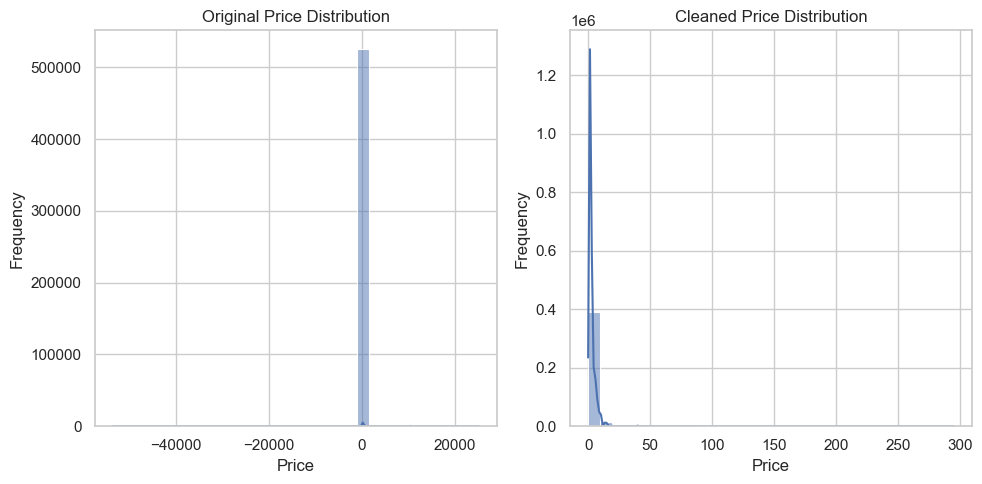

In [345]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of Prices before and after cleaning
plt.figure(figsize=(10, 5))

# Distribution of Prices in original DataFrame
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Original Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Distribution of Prices in cleaned DataFrame
plt.subplot(1, 2, 2)
sns.histplot(cleaned_df['Price'], bins=30, kde=True)
plt.title('Cleaned Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Feature Engineering

These "features" will help us gain a new perspective on our data. Recency + Frequency + Monetary Value.  

In [346]:
# Compute a line total to easily aggregate that into a sum of monetary values
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

In [347]:
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [348]:
# Aggregate data by CustomerID
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False) \
    .agg(
        MonetaryValue=("SalesLineTotal", "sum"),
        Frequency=("Invoice", "nunique"),
        LastInvoiceDate=("InvoiceDate", "max")
    )

aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [349]:
# Recency Feature --> leverage our last invoice date
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [350]:
aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10
5,12352.00,343.80,2,2010-11-29 10:07:00,10
6,12353.00,317.76,1,2010-10-27 12:44:00,43
7,12355.00,488.21,1,2010-05-21 11:59:00,202
8,12356.00,3126.25,3,2010-11-24 12:24:00,15
9,12357.00,11229.99,1,2010-11-16 10:05:00,23


Rule of thumb for # of bins determination => Square Root Rule

The number of bins is the square root of the total number of data points. It works well for quick estimates and small datasets. k=sqrt(n)

For larger datasets, The Rice Rule is more suitable and defined as: k=2 * (n)^1/3

In [351]:
import numpy as np

recency_len = len(aggregated_df["Recency"])
frequency_len = len(aggregated_df["Frequency"])
monetary_value_len = len(aggregated_df["MonetaryValue"])

recency_n_bins = int(2 * np.cbrt(recency_len)) # cube root
recency_n_bins

frequency_n_bins = int(2 * np.cbrt(frequency_len))
frequency_n_bins


monetary_n_bins = int(2 * np.cbrt(monetary_value_len))
monetary_n_bins

32

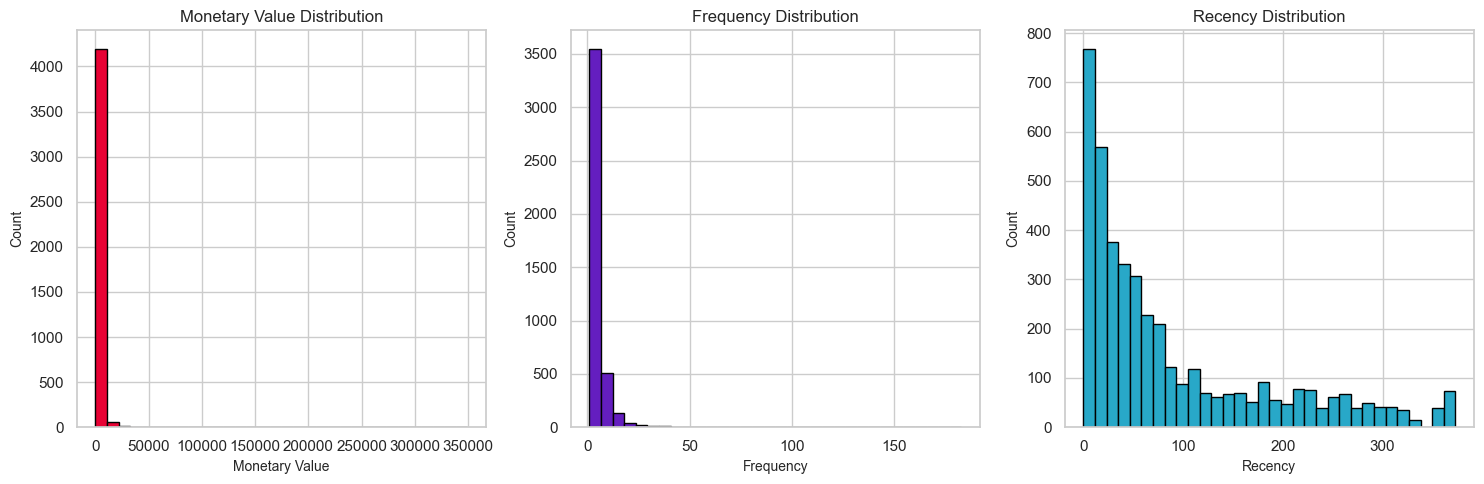

In [352]:
# Distribution of features
# Why? To look at outliers; could badly influence clustering algorithm. Our centroids could struggle to find these outliers when randomly initializing a particular centroid--> never reaching a "stability point".

# Using color-blind-friendly colors
import cmasher as cmr

# Define color-blind-friendly colors from Cmasher
colors = [cmr.guppy(0.2), cmr.guppy(0.6), cmr.guppy(0.9)]

# Plot the histograms
plt.figure(figsize=(15, 5))

# Monetary Value Distribution
plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=monetary_n_bins, color=colors[0], edgecolor='black')
plt.title('Monetary Value Distribution', fontsize=12)
plt.xlabel('Monetary Value', fontsize=10)
plt.ylabel('Count', fontsize=10)

# Frequency Distribution
plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=frequency_n_bins, color=colors[1], edgecolor='black')
plt.title('Frequency Distribution', fontsize=12)
plt.xlabel('Frequency', fontsize=10)
plt.ylabel('Count', fontsize=10)

# Recency Distribution
plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=monetary_n_bins, color=colors[2], edgecolor='black')
plt.title('Recency Distribution', fontsize=12)
plt.xlabel('Recency', fontsize=10)
plt.ylabel('Count', fontsize=10)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


Note: 'Recency' Distribution is a Poisson distribution. In RFM analysis (Recency, Frequency, and Monetary), the recency metric measures the time elapsed since a customer's interaction or transaction. The Poisson distribution can provide valuable insights into recency by modeling the occurrence of events (i.e. transactions) over time, helping you answer questions about customer behavior. 

1. Likelihood of Recent Transactions -> estimate probability of customer making a transaction within a specific time interval (ie. if average transaction rate is 3 per week or λ=3, you can caluclate probability that a customer has transacted within the past 2 days or is overdue for a transaction).
2. Identifying Active vs. Inactive Customers -> customers with a low probability of recent activity (based on the Poisson model) are likely to fall into the "inactive" segment. This helps classify customers into retention or reactivation campaigns by identifying how their observed recency deviates from the expected behavior.

3. Recency-Based Segmentation -> use Poisson distribution to categorize customers based on how their recency compares to the expected rate (λ). 

Box Plot:

Outliers: Data points that are significantly different from the rest of the data are called outliers. They are plotted as single dots on the box plot. Outliers can be calculated mathematically using the following rules: 
* Low outliers: Values less than Q1 - (1.5 × IQR) 
* High outliers: Values greater than Q3 + (1.5 × IQR)


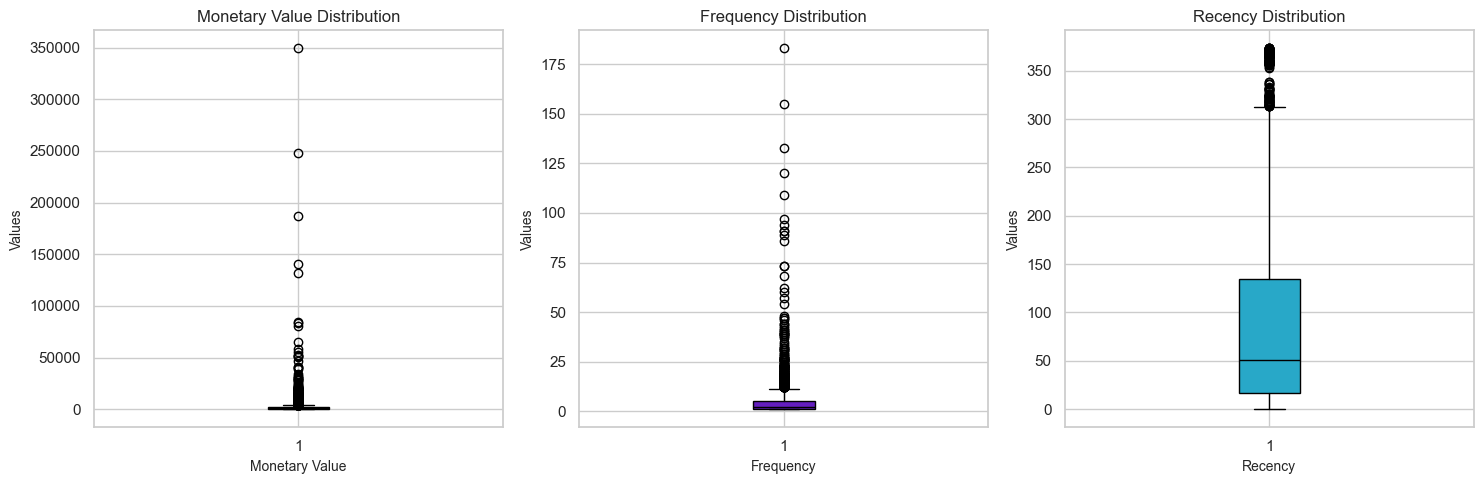

In [353]:
import matplotlib.pyplot as plt
import cmasher as cmr

# Define color-blind-friendly colors from Cmasher
colors = [cmr.guppy(0.2), cmr.guppy(0.6), cmr.guppy(0.9)]

# List of features to plot
features = ['MonetaryValue', 'Frequency', 'Recency']
feature_titles = ['Monetary Value', 'Frequency', 'Recency']

# Plot the box plots
plt.figure(figsize=(15, 5))

for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(aggregated_df[feature], patch_artist=True, boxprops=dict(facecolor=colors[i], color='black'),
                medianprops=dict(color='black'), whiskerprops=dict(color='black'),
                capprops=dict(color='black'))
    plt.title(f'{feature_titles[i]} Distribution', fontsize=12)
    plt.xlabel(feature_titles[i], fontsize=10)
    plt.ylabel('Values', fontsize=10)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


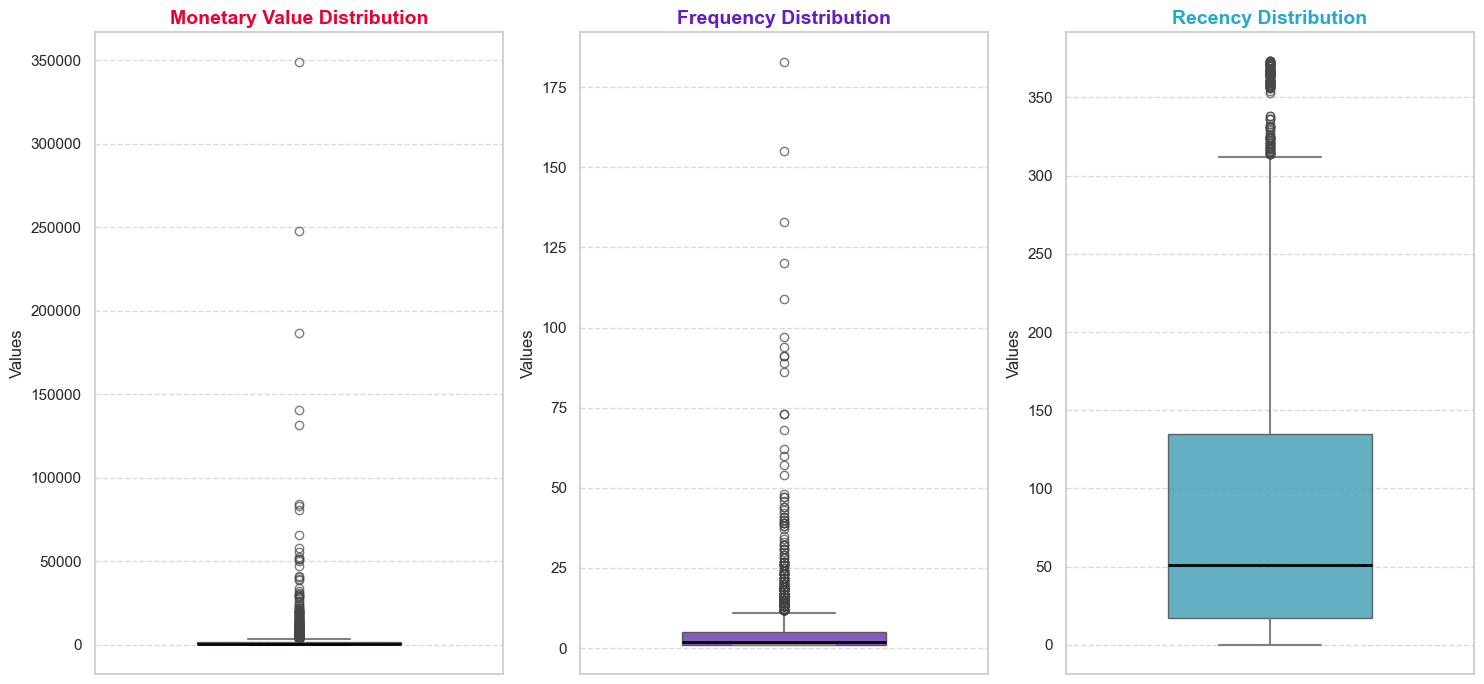

In [354]:
import matplotlib.pyplot as plt
import cmasher as cmr
import seaborn as sns

# Define color-blind-friendly colors from Cmasher
colors = [cmr.guppy(0.2), cmr.guppy(0.6), cmr.guppy(0.9)]

# List of features to plot
features = ['MonetaryValue', 'Frequency', 'Recency']
feature_titles = ['Monetary Value', 'Frequency', 'Recency']

# Set a modern style using seaborn
sns.set_theme(style="whitegrid", context="notebook")

# Create the figure
plt.figure(figsize=(15, 7))

for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    # Draw the box plot
    sns.boxplot(
        y=aggregated_df[feature],
        color=colors[i],
        width=0.5,
        boxprops=dict(alpha=0.8),  # Semi-transparent box
        medianprops=dict(color='black', linewidth=2),  # Highlight median
        whiskerprops=dict(color='gray', linewidth=1.5),
        capprops=dict(color='gray', linewidth=1.5),
        flierprops=dict(marker='o', color='red', alpha=0.7)  # Customize outliers
    )
    
    # Add fancy gridlines
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Customize the title and labels
    plt.title(f'{feature_titles[i]} Distribution', fontsize=14, weight='bold', color=colors[i])
    plt.xlabel('', fontsize=12)
    plt.ylabel('Values', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In the case of e-commerce, the outliers in Frequency and MonetaryValue are valuable customers. May not want to completely omit them.


In [355]:
# 25th Percentile
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q1 # ~307.56 £


np.float64(307.56)

In [356]:
# 75th Percentile
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_Q3 # ~1704.29 £

np.float64(1704.29)

In [357]:
# Interquartile Range
M_IQR = M_Q3 - M_Q1

M_IQR

np.float64(1396.73)

In [358]:
monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < M_Q1 - 1.5 * M_IQR)]

In [359]:
monetary_outliers_df.describe()

# 423 count outliers; minimum = 3802 pounds and maximum = ~350,000 pounds

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [360]:
# Frequency Outliers

# 25th Percentile
F_Q1 = aggregated_df["Frequency"].quantile(0.25)
# 1.0
# 75th Percentile 
F_Q3 = aggregated_df["Frequency"].quantile(0.75)
# 5.0

F_IQR = F_Q3 - F_Q1
# 4.0

In [361]:
# Separate out Frequency Outliers. 
frequency_outliers_df = aggregated_df[(aggregated_df["Frequency"] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df["Frequency"] < (F_Q1 - 1.5*F_IQR))]


frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


In [362]:
# Recency Outliers

# 25th Percentile
R_Q1 = aggregated_df["Recency"].quantile(0.25)
# 17.0

# 75th Percentile 
R_Q3 = aggregated_df["Recency"].quantile(0.75)
# 135.0 

# IQR 
R_IQR = R_Q3 - R_Q1
# 118.0 


In [363]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df))]
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3862.00,3862.00,3862.00,3862,3862.00
mean,15384.60,910.88,3.03,2010-09-04 11:39:34.458829824,96.07
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13920.25,283.43,1.00,2010-07-13 13:19:45,22.00
50%,15398.00,599.54,2.00,2010-10-13 14:43:30,57.00
75%,16863.75,1309.61,4.00,2010-11-17 16:55:45,149.00
max,18287.00,3788.21,62.00,2010-12-09 20:01:00,373.00
std,1694.57,843.66,2.76,NaN,97.89


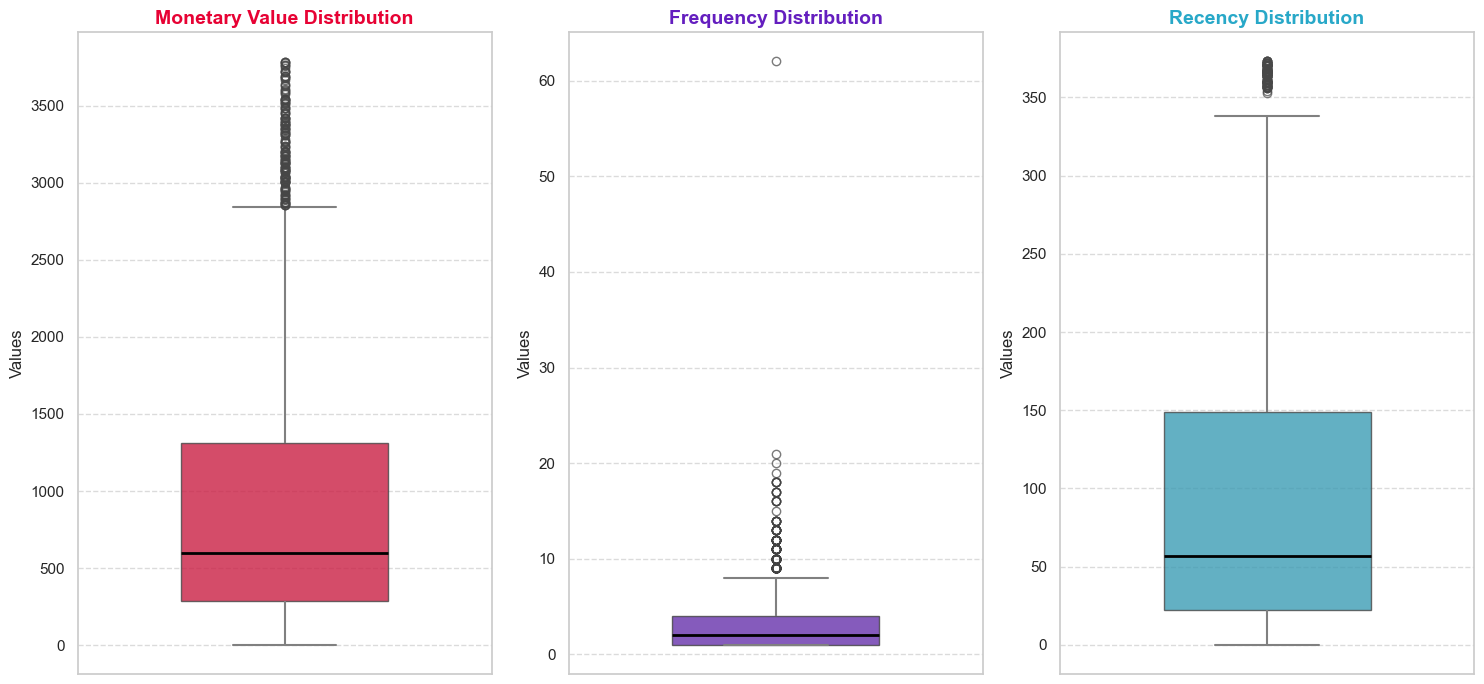

In [364]:
import matplotlib.pyplot as plt
import cmasher as cmr
import seaborn as sns

# Define color-blind-friendly colors from Cmasher
colors = [cmr.guppy(0.2), cmr.guppy(0.6), cmr.guppy(0.9)]

# List of features to plot
features = ['MonetaryValue', 'Frequency', 'Recency']
feature_titles = ['Monetary Value', 'Frequency', 'Recency']

# Set a modern style using seaborn
sns.set_theme(style="whitegrid", context="notebook")

# Create the figure
plt.figure(figsize=(15, 7))

for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    # Draw the box plot
    sns.boxplot(
        y=non_outliers_df[feature],
        color=colors[i],
        width=0.5,
        boxprops=dict(alpha=0.8),  # Semi-transparent box
        medianprops=dict(color='black', linewidth=2),  # Highlight median
        whiskerprops=dict(color='gray', linewidth=1.5),
        capprops=dict(color='gray', linewidth=1.5),
        flierprops=dict(marker='o', color='red', alpha=0.7)  # Customize outliers
    )
    
    # Add fancy gridlines
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Customize the title and labels
    plt.title(f'{feature_titles[i]} Distribution', fontsize=14, weight='bold', color=colors[i])
    plt.xlabel('', fontsize=12)
    plt.ylabel('Values', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Text(0.5, 0.92, '3D Scatter Plot of Customer Data')

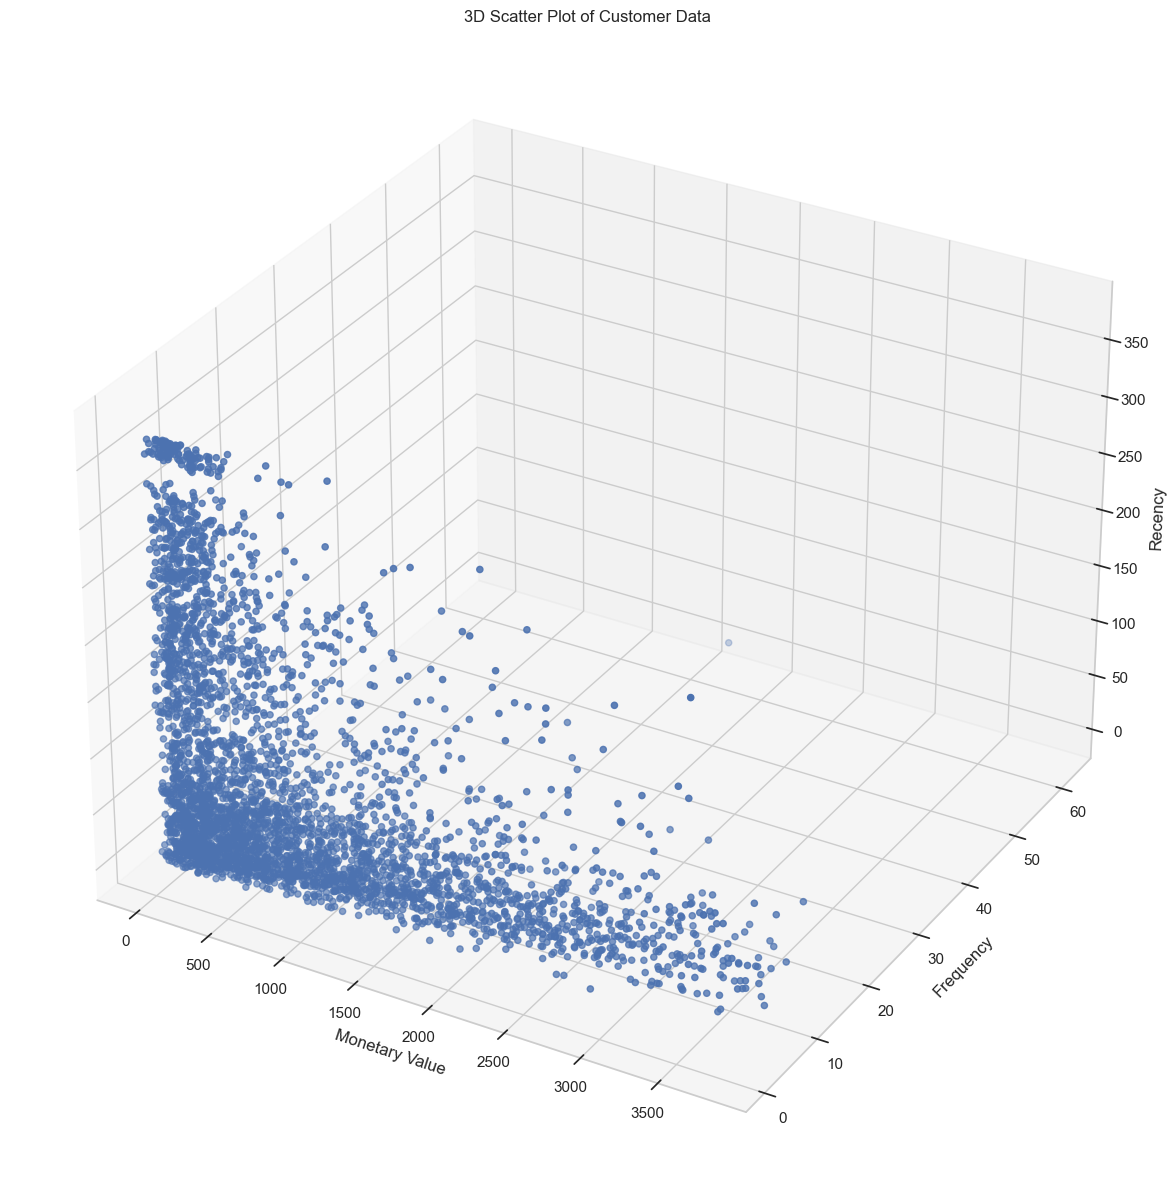

In [365]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,15))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    non_outliers_df["MonetaryValue"],
    non_outliers_df["Frequency"],
    non_outliers_df["Recency"]
)

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

Matplotlib has already scaled the data for us to visually have a more informative picture. Important for k-means since it is sensitive to scaling --> centroids would dramatically shift towards MonetaryValue (bias where a metric is over-emphasized for centroid positioning). We want the algorithm to treat each metric with equal importance. 

Standard scaling transforms the features of your data to have a mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally to the analysis. 

z = ((x - μ) / (σ))

z = standardized value
x = original value
μ = mean of the feature
σ = standard deviation of the feature

So each data point/feature is treated in isolation. 

This assumes the data is normally distributed. 

When data is not normally distributed, alternative methods for standardization include: data transformations (like log, square root, or Box-Cox), using robust statistical measures (like median or quantiles), and employing non-parametric statistical tests that don't assume normality, such as the Mann-Whitney U test, Wilcoxon signed rank test, or Kruskal-Wallis test; depending on the specific skew and characteristics of your data. 


In [366]:
scaler = StandardScaler() # clause from sci-kit learn

scaled_df = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_df

 # Outputs NumPy array ... so now need to convert back to DataFrame

array([[-0.8790411 , -0.37301391,  0.69409768],
       [ 0.48893153, -0.37301391, -0.96110778],
       [-0.81763431, -0.73496861, -0.23567823],
       ...,
       [-0.63289233, -0.73496861,  2.0325663 ],
       [ 0.39778156, -0.37301391,  0.15257985],
       [ 1.64166031,  0.35089549, -0.80784802]], shape=(3862, 3))

In [367]:
scaled_df_02 = pd.DataFrame(scaled_df, index=non_outliers_df, columns=("MonetaryValue", "Frequency", "Recency"))
scaled_df_02

,MonetaryValue,Frequency,Recency
"(12346.0, 169.36, 2, 2010-06-28 13:53:00, 164)",-0.88,-0.37,0.69
"(12347.0, 1323.32, 2, 2010-12-07 14:57:00, 2)",0.49,-0.37,-0.96
"(12348.0, 221.16, 1, 2010-09-27 14:59:00, 73)",-0.82,-0.73,-0.24
"(12349.0, 2221.14, 2, 2010-10-28 08:23:00, 42)",1.55,-0.37,-0.55
"(12351.0, 300.93, 1, 2010-11-29 15:23:00, 10)",-0.72,-0.73,-0.88
...,...,...,...
"(18283.0, 641.77, 6, 2010-11-22 15:30:00, 17)",-0.32,1.07,-0.81
"(18284.0, 411.68, 1, 2010-10-04 11:33:00, 66)",-0.59,-0.73,-0.31
"(18285.0, 377.0, 1, 2010-02-17 10:24:00, 295)",-0.63,-0.73,2.03
"(18286.0, 1246.43, 2, 2010-08-20 11:57:00, 111)",0.40,-0.37,0.15


Text(0.5, 0.92, '3D Scatter Plot of Customer Data')

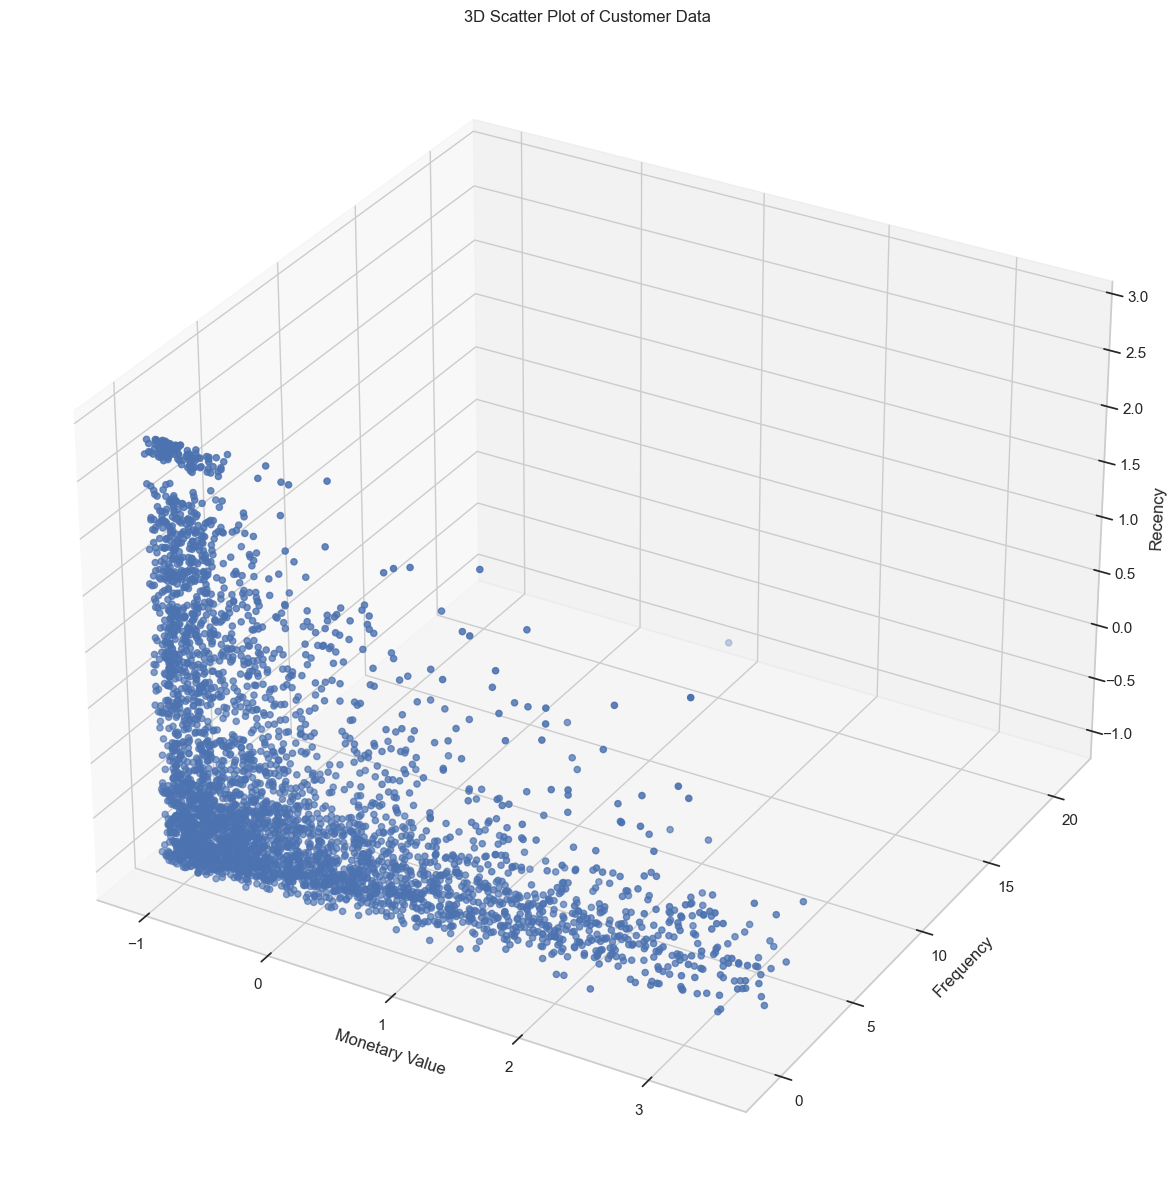

In [368]:
# Replot 3D plot.

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,15))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    scaled_df_02["MonetaryValue"],
    scaled_df_02["Frequency"],
    scaled_df_02["Recency"]
)

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

K-Means Clustering

K-Means clustering is a popular unsupervise machine learning algorithm used for partitioning a dataset into 'K' distinct, non-overlapping subgroups or clusters. One of the key concepts of K-means clustering is inertia, also known as within-cluster sum-of-squares (WCSS).

'K' -> free parameter determinining how many clusters we should assign to our data. We use the ELBOW METHOD to determine appropriate number of centroids. 

We want to reach a point where the average distance between points and centroids are minimized. This distance is known as the 'inertia'. 

* Inertia => calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters (K). However, this a tradeoff because as 'K' increases, inertia decreases. So, "inertia" is a measure of internal coherance of clusters. In the context of K-means clustering, it's defined as the sum of squared distances of samples to their closest cluster center/centroid. Mathematically, it is expressed as:

Inertia = Σ(x in dataset) min(||x - μ||²)

**'random_state' => ensures that random initialization of centroids and the assignment process to clusters are repeatable, leading to the same clustering results every time. 


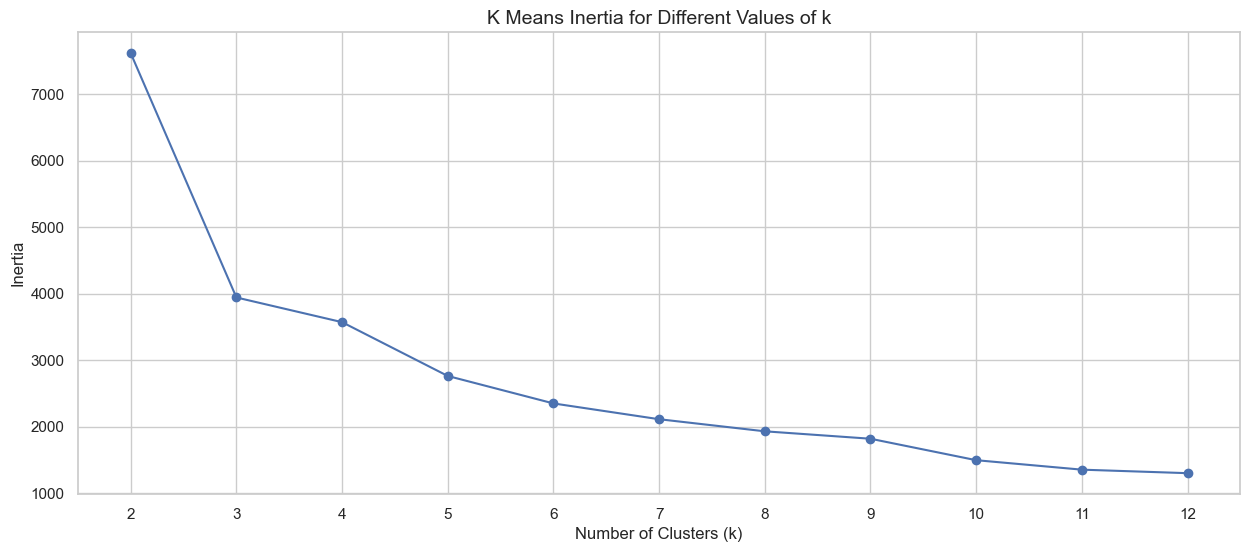

In [369]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Add upper limit
max_k = 12
inertia = []  # Fixed typo in the variable name
k_values = range(2, max_k + 1)

# Loop through k-values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    kmeans.fit(scaled_df_02)  # Fit the model
    inertia.append(kmeans.inertia_)  # Save inertia for each k

# Plot the inertia values
plt.figure(figsize=(15, 6))
plt.plot(k_values, inertia, marker="o")
plt.title("K Means Inertia for Different Values of k", fontsize=14)  # Fixed title
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.xticks(k_values)
plt.grid(True)
plt.show()


To decide between k=3 or k=5, we use the Silhouette Score. The silhouette score is an excellent metric to evaluate the quality of clusters and decide the optimal number of clusters, k. It measures how well samples are clustered and balances cluster cohesion (points within a cluster being close together) and cluster separation (clusters being far apart).

S = ((b(i) - a(i)) / max(a(i),b(i)))

S => silhouette score for a single sample 'i'
a(i) => average distance between 'i' and all other points in the same cluster
b(i) => minimum average distance between 'i' and all points in the nearest cluster to which 'i' does not belong.

High score - good; Lower score - indicative of a lot of overlapping. 

The silhouette score ranges between [-1,1], a higher value indicates more distinct clusters.

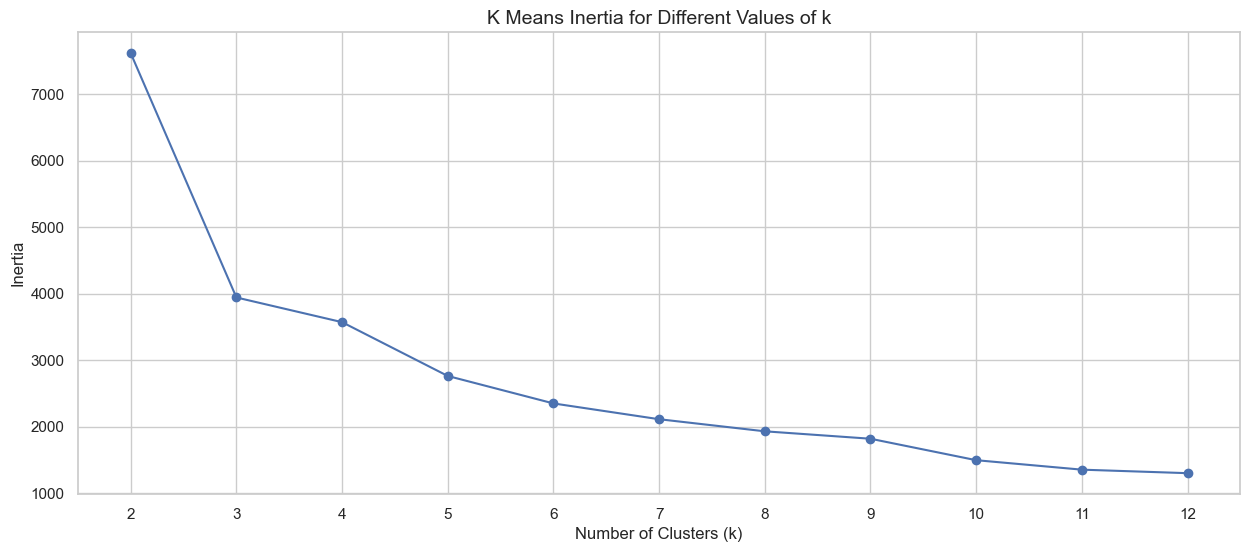

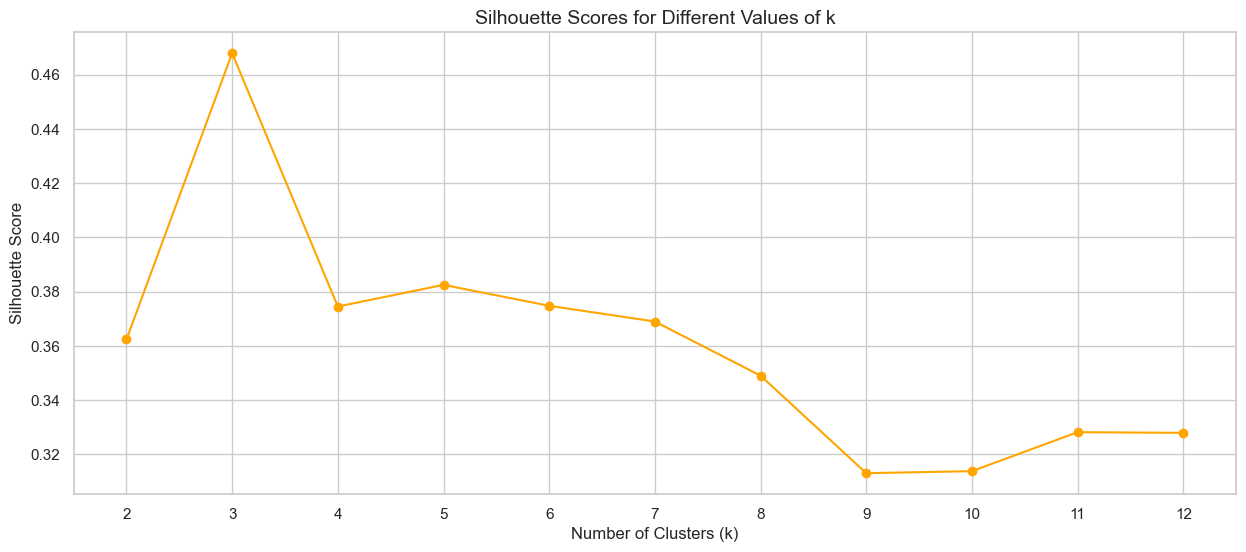

In [370]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Add upper limit
max_k = 12
inertia = []  # To store inertia values
silhouette_scores = []  # To store silhouette scores
k_values = range(2, max_k + 1)

# Loop through k-values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_df_02)  # Fit the model and get cluster labels
    sil_score = silhouette_score(scaled_df_02, cluster_labels)  # Compute silhouette score
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)  # Save inertia for each k

# Plot the inertia values
plt.figure(figsize=(15, 6))
plt.plot(k_values, inertia, marker="o")
plt.title("K Means Inertia for Different Values of k", fontsize=14)  # Fixed title
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Plot silhouette scores
plt.figure(figsize=(15, 6))
plt.plot(k_values, silhouette_scores, marker="o", color='orange')
plt.title("Silhouette Scores for Different Values of k", fontsize=14)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [371]:
# Create final model
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_df_02)

cluster_labels

array([0, 1, 1, ..., 0, 1, 2], shape=(3862,), dtype=int32)

In [372]:
# Now add these cluster labels to original data (create new column in non-outliers DF)
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

/var/folders/pq/bw38f5qj1134kkww2kmr2rgr0000gn/T/ipykernel_13004/150444443.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,0
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,1
2,12348.00,221.16,1,2010-09-27 14:59:00,73,1
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,2
4,12351.00,300.93,1,2010-11-29 15:23:00,10,1
...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,1
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,1
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,0
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,1


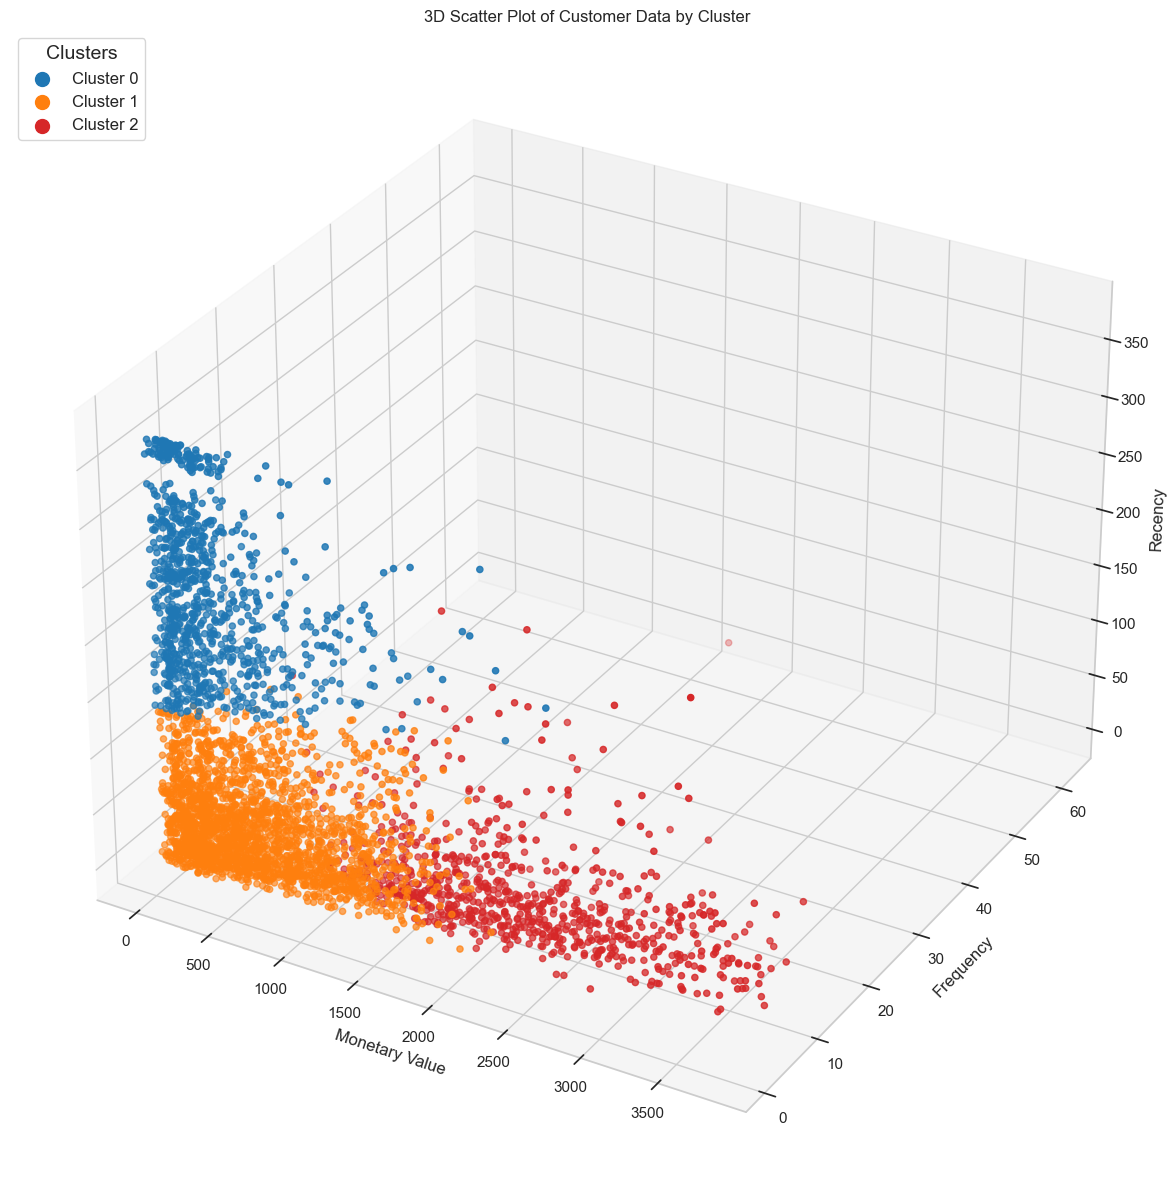

In [374]:
cluster_colors = {
    0: '#1f77b4', #Blue
    1: '#ff7f0e', #Orange
    2: '#d62728', #Red
}
colors = non_outliers_df['Cluster'].map(cluster_colors) # maps colors onto cluster value assignments

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(
    non_outliers_df["MonetaryValue"],
    non_outliers_df["Frequency"],
    non_outliers_df["Recency"],
    c=colors, # Use mapped solid colors
    marker='o'
)

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

# Add a legend manually
legend_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']
for cluster, color in cluster_colors.items():
    ax.scatter([], [], [], color=color, label=f'{legend_labels[cluster]}', s=100)
ax.legend(title="Clusters", fontsize=12, title_fontsize=14, loc='upper left', frameon=True)

plt.show()
plt.show()

Text(0, 0.5, 'Recency')

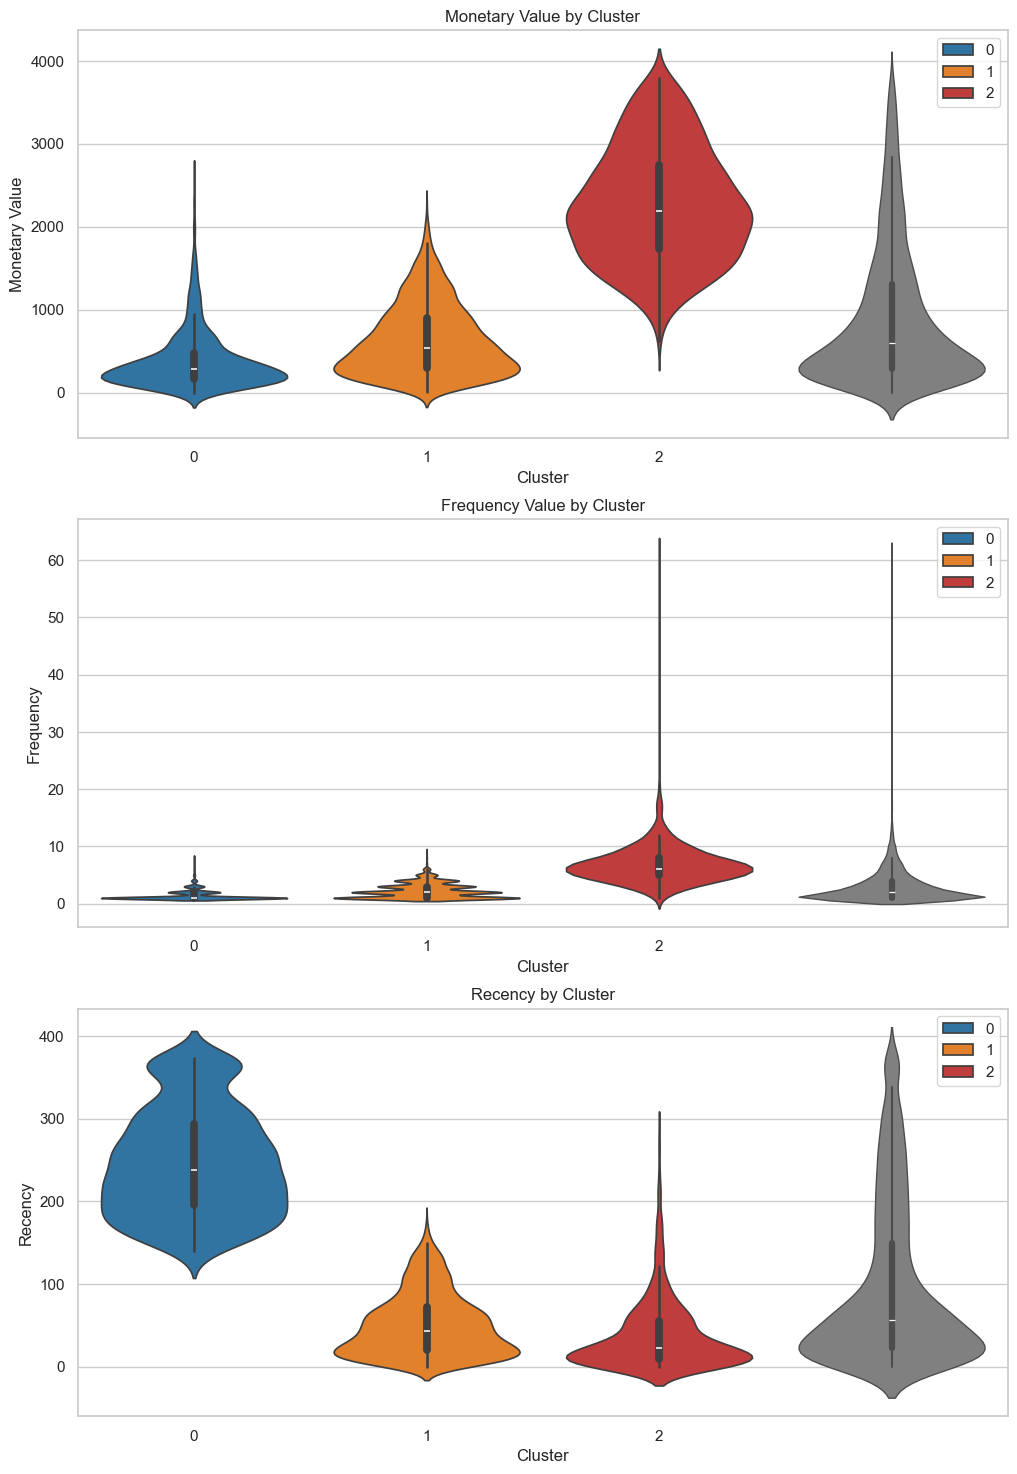

In [390]:
# Now interpret the clusters more rigorously. So we use Violin Plot for distribution of features. 
plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')


plt.subplot(3,1,2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency Value by Cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

**The gray violin plots demonstrate distribution of data without clustering. 


1. Cluster 0 (Blue): "Nurture"
- Recency: high, recent purchase. Low frequency and lowest (comparative) monetary value.
- Rationale: this cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
- Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases. 

2. Cluster 1 (Orange): "Re-Engage"
- Rationale: This group includes lower-value, infrequent buyers than "Retain" conglomerate. The focus should be on re-engagement to bring them towards a more active purchasing behavior.
- Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again. 

3. Cluster 2 (Red): "Reward"
- Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels. 
- Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active. Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.



In [400]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)
overlap_indices

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

In [402]:
outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers]) # union ^ values and stack into a list

outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


Text(0, 0.5, 'Recency')

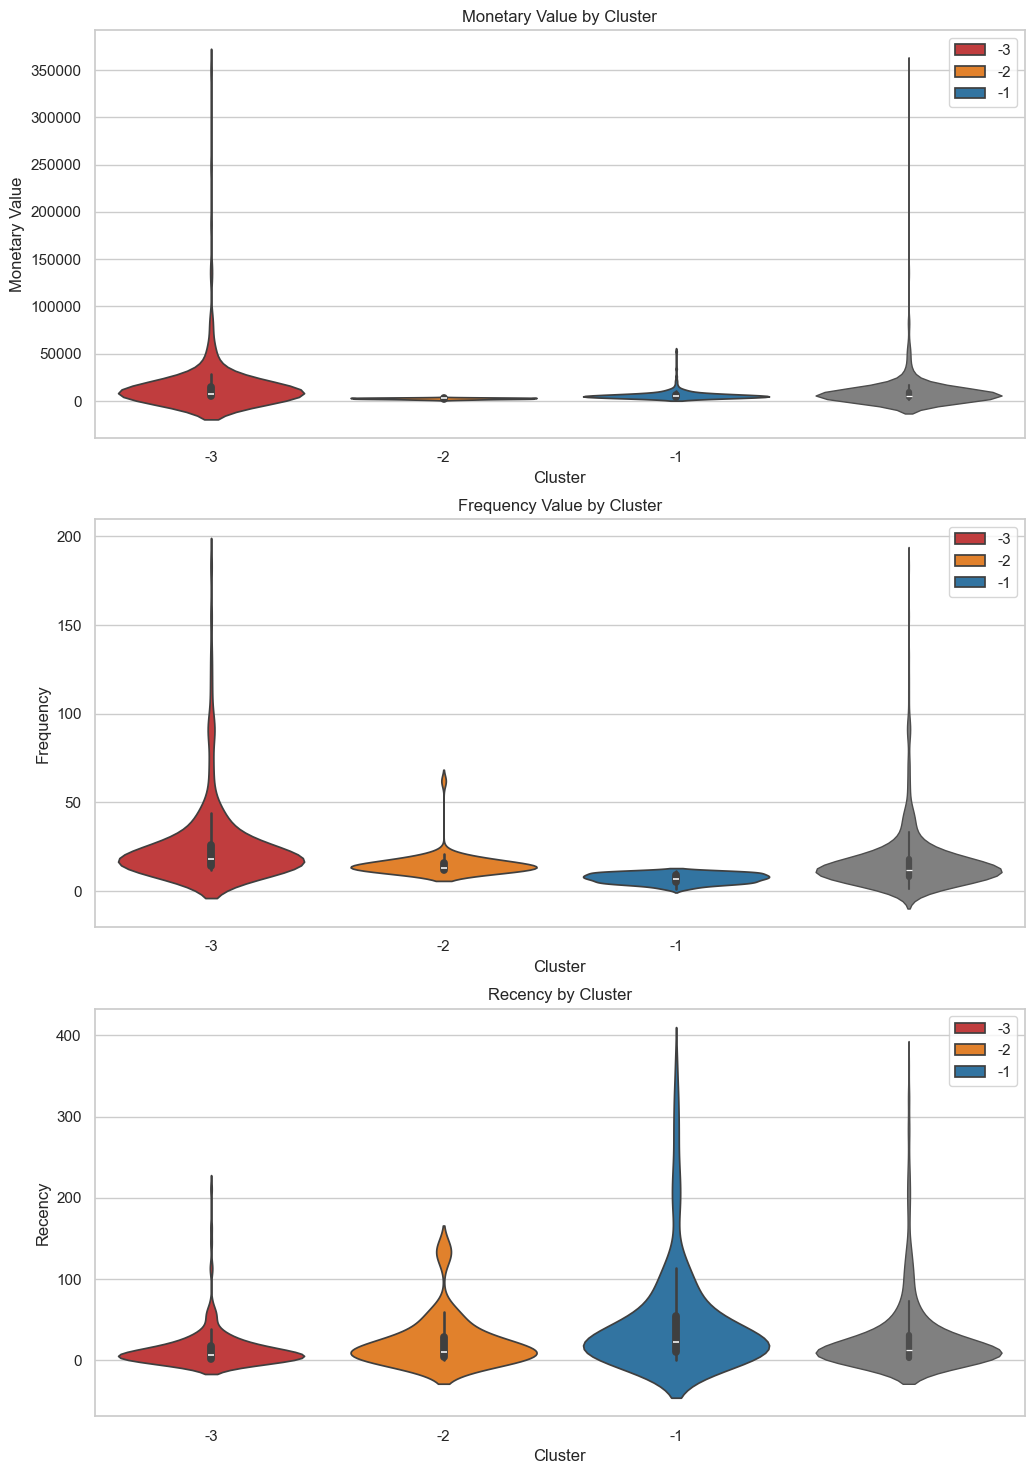

In [403]:
# Violin Plot

cluster_colors = {
    -1: '#1f77b4', #Blue
    -2: '#ff7f0e', #Orange
    -3: '#d62728', #Red
}
colors = non_outliers_df['Cluster'].map(cluster_colors) # maps colors onto cluster value assignments


# Now interpret the clusters more rigorously. So we use Violin Plot for distribution of features. 
plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')


plt.subplot(3,1,2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency Value by Cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

1. Cluster -1: DELIGHT. Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention. Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.
2. Cluster -2: UPSELL. Characteristics: Frequent buyers who spend less per purchase (comparatively). These customers are consistently engaged but might benefit from upselling opportunities. Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.
3. Cluster -3: PAMPER: Characteristics: Median from UPSELL and DELIGHT clusters. High spenders but not necessarily frequent clients. Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

In [404]:
# Create dictionary of cluster labels

cluster_labels = {
    0: "NURTURE",
    1: "RE-ENGAGE",
    2: "REWARD",
    -1: "DELIGHT",
    -2:"UPSELL",
    -3: "PAMPER"

}

In [406]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])
full_clustering_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
count,4338.00,4338.00,4338.00,4338,4338.00,4338.00
mean,15364.28,2032.81,4.56,2010-09-11 19:35:54.550484224,88.74,0.63
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00,-3.00
25%,13898.50,310.18,1.00,2010-07-29 12:29:15,17.00,0.00
50%,15369.50,714.99,2.00,2010-10-20 12:19:30,50.00,1.00
75%,16852.50,1771.83,5.00,2010-11-22 13:29:30,133.00,1.00
max,18287.00,349164.35,183.00,2010-12-09 20:01:00,373.00,2.00
std,1701.06,8760.58,8.01,NaN,96.11,1.18


In [409]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.00,169.36,2,2010-06-28 13:53:00,164,0,NURTURE
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,1,RE-ENGAGE
2,12348.00,221.16,1,2010-09-27 14:59:00,73,1,RE-ENGAGE
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,2,REWARD
4,12351.00,300.93,1,2010-11-29 15:23:00,10,1,RE-ENGAGE
...,...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,PAMPER
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3,PAMPER
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,PAMPER
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3,PAMPER


VISUALIZATION 

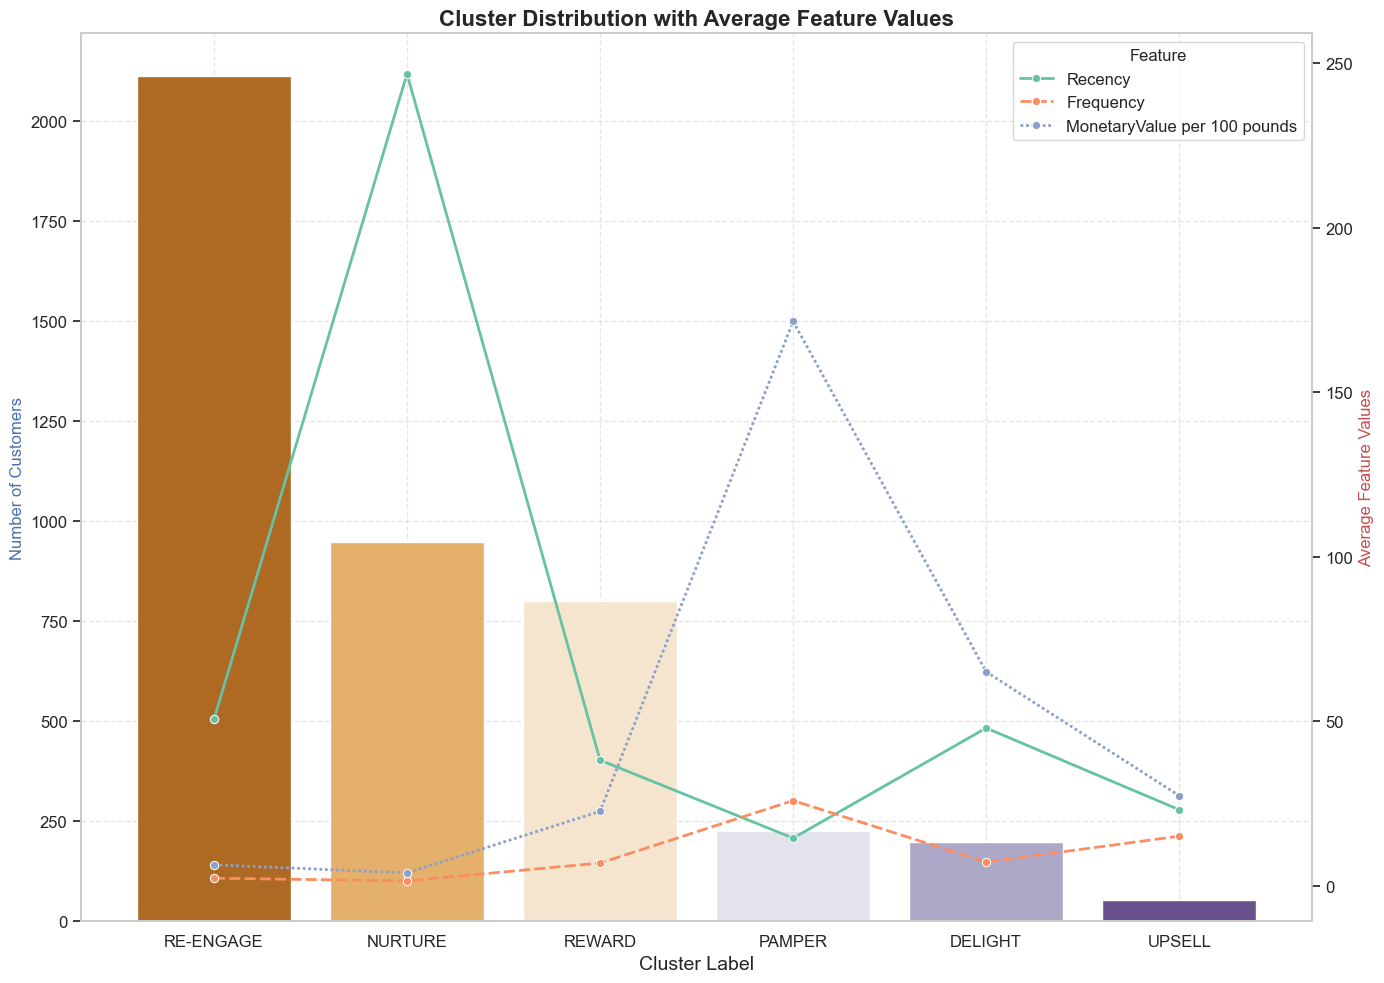

In [441]:
# Step 1: Cluster distribution and feature means visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming full_clustering_df is the DataFrame with 'ClusterLabel', 'Recency', 'Frequency', 'MonetaryValue' columns

# Step 2: Cluster volume
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
# Step 3: Average feature values per cluster
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

# Step 4: Creating a combined plot
fig, ax1 = plt.subplots(figsize=(14, 10))

# Cluster distribution using a bar plot
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='PuOr', hue=cluster_counts.index)
ax1.set_ylabel("Number of Customers", color='b')
ax1.set_title('Cluster Distribution with Average Feature Values', fontsize=16, fontweight='bold')
ax1.set_xlabel("Cluster Label", fontsize=14)

# Adding twin axes for feature means line plot
ax2 = ax1.twinx()

# Line plot for feature means
sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o', linewidth=2)
ax2.set_ylabel("Average Feature Values", color='r')
ax2.legend(title='Feature', loc='upper right', fontsize=12)

# Customizing grid lines and ticks
ax1.grid(True, linestyle='--', alpha=0.5)
ax2.grid(False)

# Improving tick labels and font sizes
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()


RE-ENGAGE predominates; may want to engage with these customers. PAMPER has high monetary value. 

Divide the monetary value by scale of 100 but to retain shape of the data. 

** We adjusted for "MonetaryValue per 100 Pounds" for readability. 